In [60]:
from app import app,db

import pandas as pd
import numpy as np
from app.models import Feature, Business, Review
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.sequential import Reds_9
from palettable.colorbrewer.sequential import Greens_9
import mpld3
import matplotlib.pyplot as plt
%matplotlib inline

def pos_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Greens_9.colors[np.random.randint(2,8)])
def neg_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Reds_9.colors[np.random.randint(2,8)])

def get_adjectives(blob):
    return [word for word,tag in blob.tags if 'JJ' in tag]

In [2]:
reviews = pd.read_sql_table('reviews',app.config['SQLALCHEMY_DATABASE_URI'])
word_counts = pd.read_sql_table('feature',app.config['SQLALCHEMY_DATABASE_URI'])

In [3]:
bid = 'eq6lQI039SBLC6sHm3idGA'
words = word_counts[word_counts['business_id']==bid]
body = ''
for i,row in words.iterrows():
    word = row['phrase']
    n = row['count']
    text = ' '.join([word]*n)
    body += text+' '

In [4]:
body

'midst terrific lover lover lover lover lover lover lover lover lover existence existence dog dog bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar bar hair row row alright alright vice complaint complaint complaint complaint life life life life life life life life life life life life life life life life crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crust crus

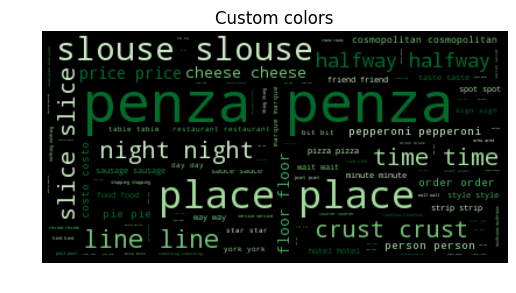

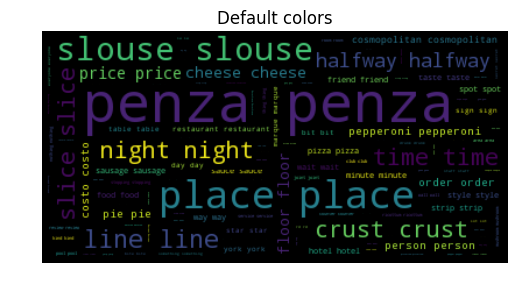

In [7]:
wc = WordCloud(max_words=1000, margin=10,min_font_size=1,
               background_color="black",
               random_state=1).generate(body)
default_colors = wc.to_array()

plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=pos_color_func, random_state=3))
plt.axis("off")
plt.show()
plt.title("Default colors")
plt.imshow(default_colors)
plt.axis("off")
plt.show()

In [21]:
revs = reviews[reviews['business_id']==bid]
body = revs['text'].str.cat().lower()
blob = TextBlob(body)
adjs = get_adjectives(blob)

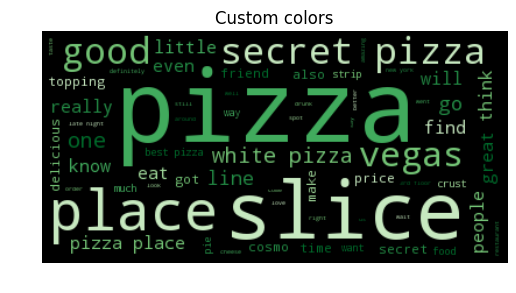

In [24]:
wc = WordCloud(stopwords=STOPWORDS,max_words=3000, margin=10,
               background_color="black",
               random_state=1).generate(body)
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=pos_color_func, random_state=3))
plt.axis("off")
plt.show()

In [51]:
bids = db.session.query(Business.business_id,
                       Business.name).all()
bid = np.random.choice(bids)
bid

ValueError: a must be 1-dimensional

In [54]:
idx = np.random.randint(0, len(bids))
idx

19400

In [47]:
query = db.session.query(Review.text, Review.stars).filter_by(business_id=bid)
revs = pd.DataFrame(query.all())
revs.columns = query.first().keys()

In [48]:
r = query.first()

In [49]:
r.keys()

['text', 'stars']

In [50]:
revs

,text,stars
0,Cool Cuts was recommended to me by another Mom...,4
1,I wanted to wait to review this because we hav...,2
2,This is the only place I bring my son for his ...,4
3,I took my son here for his first haircut a few...,3
4,"Horrible service , you sit and wait and then t...",1
5,I have taken my son there for three haircuts a...,1
6,"My son is 4 and as embarassing to say, i have ...",4
7,I just brought my son here for the second time...,5
8,Our son turns 1 in a few days and was starting...,4
9,My 23 month old hates haircuts and I am always...,5


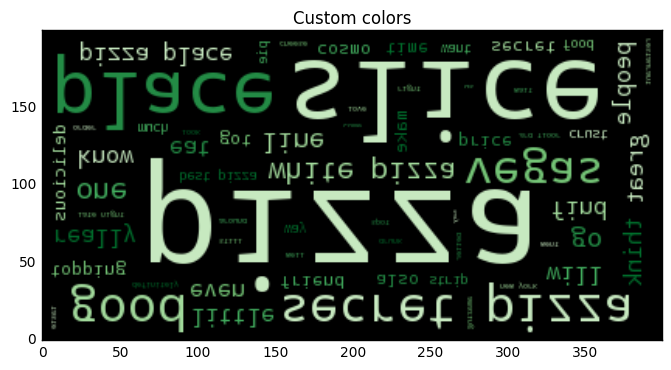

In [64]:
fig,ax = plt.subplots(figsize=(8,6),frameon=False)
ax.set_title("Custom colors")
ax.imshow(wc,origin='lower')
ax.axis("off")

plt.show()

In [61]:
mpld3.fig_to_html(fig)

'\n\n<style>\n\n</style>\n\n<div id="fig_el2228978151164486134096852"></div>\n<script>\nfunction mpld3_load_lib(url, callback){\n  var s = document.createElement(\'script\');\n  s.src = url;\n  s.async = true;\n  s.onreadystatechange = s.onload = callback;\n  s.onerror = function(){console.warn("failed to load library " + url);};\n  document.getElementsByTagName("head")[0].appendChild(s);\n}\n\nif(typeof(mpld3) !== "undefined" && mpld3._mpld3IsLoaded){\n   // already loaded: just create the figure\n   !function(mpld3){\n       \n       mpld3.draw_figure("fig_el2228978151164486134096852", {"axes": [{"id": "el222895689944720", "axes": [{"nticks": 10, "position": "bottom", "scale": "linear", "tickvalues": null, "fontsize": 10.0, "grid": {"gridOn": false}, "tickformat": null}, {"nticks": 6, "position": "left", "scale": "linear", "tickvalues": null, "fontsize": 10.0, "grid": {"gridOn": false}, "tickformat": null}], "texts": [{"color": "#000000", "fontsize": 12.0, "coordinates": "axes", "rot